In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler, minmax_scale

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

from sklearn.cluster import MeanShift, estimate_bandwidth

from itertools import cycle
from sklearn.mixture import GaussianMixture

import statsmodels.api as sm

import statsmodels.formula.api as smf

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
# Regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

import statsmodels.api as sm

import statsmodels.formula.api as smf

# Para preparar los datos
from sklearn.preprocessing import LabelEncoder

# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 

# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier

# Para usar Random Tree Forest como clasificador
from sklearn.ensemble import RandomForestClassifier

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import model_selection

# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
#from sklearn.metrics import plot_confusion_matrix

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV

# Para la validación cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

#Librerías para la visualización
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns 
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

#SMF
import statsmodels.formula.api as smf

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

# check version number
import imblearn

from collections import Counter

from imblearn.over_sampling import SMOTE, ADASYN

# Análisis Goles por Liga

In [2]:
# Se cargan los datos
# Ubicación de los datos, deben estar en la misma carpeta que este notebook
# pais = "belgica"
# liga = "pro-league"

# file = open(f"versiones/{pais}_{liga}.txt", "r")
# version = int(file.read())-1
# file.close()

# db_location = f"datos_laliga_final_partidos.xlsx"
# db_location2 = f"proximos_partidoLaliga.xlsx"

db_location = f"datos_laliga_final_partidos.xlsx"
db_location2 = f"proximos_partidoLaliga.xlsx"


# db_location= "data_matches_mismarcadores_half0.xlsx"


# Se leen los datos, estan separados con ','
# data1 = pd.read_excel(db_location, sheet_name="Premier League 20222023")
# data2 = pd.read_excel(db_location, sheet_name="Premier League 20212022")
# data = pd.concat([data1,data2])
data = pd.read_excel(db_location)

proximos_partidos= pd.read_excel(db_location2)

In [3]:
data.columns

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'HG', 'AG', 'HP', 'AP',
       'HTS', 'ATS', 'HSI', 'ASI', 'HSO', 'ASO', 'HBS', 'ABS', 'HFK', 'AFK',
       'HC', 'AC', 'HOFF', 'AOFF', 'HTI', 'ATI', 'HGS', 'AGS', 'HF', 'AF',
       'HRC', 'ARC', 'HYC', 'AYC', 'HTP', 'ATP', 'HPC', 'APC', 'HT', 'AT',
       'HA', 'AA', 'HDA', 'ADA', 'Resultado', 'Fecha', 'HPCru', 'APCru', 'HTo',
       'ATo', 'HInter', 'AInter', 'HDAG', 'ADAG', 'HDespeje', 'ADespeje',
       'HGK', 'AGK', 'HPelotazos', 'APelotazos', 'HxG', 'AxG'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  281 non-null    int64  
 1   Date        281 non-null    object 
 2   HomeTeam    281 non-null    object 
 3   AwayTeam    281 non-null    object 
 4   HG          281 non-null    int64  
 5   AG          281 non-null    int64  
 6   HP          281 non-null    object 
 7   AP          281 non-null    object 
 8   HTS         281 non-null    int64  
 9   ATS         281 non-null    int64  
 10  HSI         281 non-null    int64  
 11  ASI         281 non-null    int64  
 12  HSO         281 non-null    int64  
 13  ASO         281 non-null    int64  
 14  HBS         275 non-null    float64
 15  ABS         275 non-null    float64
 16  HFK         267 non-null    float64
 17  AFK         267 non-null    float64
 18  HC          281 non-null    int64  
 19  AC          281 non-null    i

In [5]:
data.fillna(value=0,inplace=True)
data

,Unnamed: 0,Date,HomeTeam,AwayTeam,HG,AG,HP,AP,HTS,ATS,...,HDAG,ADAG,HDespeje,ADespeje,HGK,AGK,HPelotazos,APelotazos,HxG,AxG
0,21,21.05.2023 11:30,Valencia,Real Madrid,1,0,27%,73%,12,13,...,5,9,27,10,11,5,51,51,1.0,1.4
1,23,21.05.2023 07:00,Rayo Vallecano,Espanyol,1,2,64%,36%,15,10,...,13,19,18,29,7,8,88,75,2.0,1.6
2,24,20.05.2023 14:00,Barcelona,Real Sociedad,1,2,67%,33%,13,13,...,10,10,8,30,5,4,57,54,1.5,2.0
3,25,20.05.2023 11:30,Almería,Mallorca,3,0,54%,46%,12,7,...,14,19,24,13,7,4,57,74,1.8,0.8
4,26,20.05.2023 11:30,Getafe,Elche,1,1,38%,62%,9,13,...,21,25,27,27,11,8,75,71,1.5,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,364,14.08.2022 12:30,Valencia,Girona,1,0,46%,54%,17,5,...,9,14,17,10,5,6,57,60,1.6,0.1
277,365,14.08.2022 10:30,Cádiz,Real Sociedad,0,1,40%,60%,7,15,...,19,20,20,27,4,10,90,63,0.2,1.5
278,366,13.08.2022 14:00,Barcelona,Rayo Vallecano,0,0,67%,33%,21,4,...,10,6,7,18,6,13,70,76,1.9,0.5
279,367,13.08.2022 12:00,Real Valladolid,Villarreal,0,3,52%,48%,12,10,...,10,12,18,16,10,12,64,78,1.0,1.5


In [6]:
# corr_df=data.corr(method='pearson')

# plt.figure(figsize=(40, 30))
# sns.heatmap(corr_df, annot=True)
# plt.show()

In [7]:
def conseguir_anio(texto):
    return (texto.split()[0]).split(".")[2]
def conseguir_mes(texto):
    return (texto.split()[0]).split(".")[1]
def conseguir_dia(texto):
    return (texto.split()[0]).split(".")[0]
def quitar_por(texto):
    return (texto.replace("%",""))    

In [8]:
data['year'] = (data['Date'].apply(conseguir_anio))
data['month'] = (data['Date'].apply(conseguir_mes))
data['day'] = (data['Date'].apply(conseguir_dia))
data['HP'] = data['HP'].apply(quitar_por)
data['AP'] = data['AP'].apply(quitar_por)
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)
data['HP'] = data['HP'].astype(int)
data['AP'] = data['AP'].astype(int)
data['Fecha']= pd.to_datetime(data[['year','month','day']])

data['TG'] = data['HG'] + data['AG']
data['TxG'] = data['HxG'] + data['AxG']
data['Mas2Goles'] = np.where(data['TG'] > 2,1,0)

data_backup= data.copy()

In [9]:
selected_cols = ['HSI','ASI','HGS','AGS','HTo','ADespeje']

In [10]:
string = ""
for i in data_backup.columns:
    string=string+ i +"+"
string= string[:-1]
string

'Unnamed: 0+Date+HomeTeam+AwayTeam+HG+AG+HP+AP+HTS+ATS+HSI+ASI+HSO+ASO+HBS+ABS+HFK+AFK+HC+AC+HOFF+AOFF+HTI+ATI+HGS+AGS+HF+AF+HRC+ARC+HYC+AYC+HTP+ATP+HPC+APC+HT+AT+HA+AA+HDA+ADA+Resultado+Fecha+HPCru+APCru+HTo+ATo+HInter+AInter+HDAG+ADAG+HDespeje+ADespeje+HGK+AGK+HPelotazos+APelotazos+HxG+AxG+year+month+day+TG+TxG+Mas2Goles'

In [11]:
data['TG'].value_counts()

2    68
3    67
1    62
4    37
0    18
5    17
6    10
8     2
Name: TG, dtype: int64

In [12]:
data_backup_2=  data_backup.copy()
data_backup = data_backup[(data_backup['TG']>0) & (data_backup['TG']<6)].copy()

In [13]:
data_backup['TG'].value_counts()

2    68
3    67
1    62
4    37
5    17
Name: TG, dtype: int64

In [14]:
data['Mas2Goles'].value_counts()

0    148
1    133
Name: Mas2Goles, dtype: int64

In [15]:
'HPCru+APCru+HTo+ATo+HInter+AInter+HDAG+ADAG+HDespeje+ADespeje+HGK+AGK+HPelotazos+APelotazos+HxG+AxG'

'HPCru+APCru+HTo+ATo+HInter+AInter+HDAG+ADAG+HDespeje+ADespeje+HGK+AGK+HPelotazos+APelotazos+HxG+AxG'

In [16]:
lm1 = smf.ols(formula = 'TG ~ HSI+ASI+HGS+AGS+HTo+ADespeje', data=data_backup).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TG   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     5000.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):          3.15e-252
Time:                        00:56:35   Log-Likelihood:                 202.55
No. Observations:                 251   AIC:                            -391.1
Df Residuals:                     244   BIC:                            -366.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0584      0.041      1.416      0.158      -0.023       0.140
HSI            0.9937      0.007    140.311      0.000       0.980       1.008
ASI            0.9987      0.008    124.322      0.000       0.983       1.015
HGS           -1.0040      0.010   -104.529      0.000      -1.023      -0.985
AGS           -0.9965      0.008   -123.881      0.000      -1.012      -0.981
HTo        -9.824e-06   6.33e-05     -0.155      0.877      -0.000       0.000
ADespeje      -0.0004      0.001     -0.427      0.670      -0.002       0.001
==============================================================================
Omnibus:                      416.184   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64978.825
Skew:                           8.819   Prob(JB):                         0.00
Kurtosis:                      79.825   Cond. No.                     3.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Selección sub-datasets

In [17]:
x_drop=data_backup[selected_cols]
feature_names= selected_cols
X = np.array(x_drop)
y = np.array(data_backup['TG'])

# Smote

In [18]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# Estandarización

In [19]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [20]:
ss = StandardScaler()
X_tr_df= pd.DataFrame(X_train,columns=feature_names)
y_tr_df= pd.DataFrame(y_train,columns=['TG'])
train_comp= pd.concat([X_tr_df,y_tr_df],1)

X_te_df= pd.DataFrame(X_test,columns=feature_names)
y_te_df= pd.DataFrame(y_test,columns=['TG'])
test_comp= pd.concat([X_te_df,y_te_df],1)

# Estandarizacion X_train
X_train_estd = ss.fit_transform(train_comp)
X_train_estd = pd.DataFrame(X_train_estd,columns=train_comp.columns)

# Estandarizacion X_test
X_test_estd = ss.transform(test_comp)
X_test_estd = pd.DataFrame(X_test_estd,columns=test_comp.columns)

#Separar de nuevo X's y y's
X_train= np.array(X_train_estd.drop(['TG'],1))
X_test= np.array(X_test_estd.drop(['TG'],1))
# y_train= np.array(X_train_estd['PasoONo'])
# y_test= np.array(X_test_estd['PasoONo'])

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13244\3009045962.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  train_comp= pd.concat([X_tr_df,y_tr_df],1)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13244\3009045962.py:8: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  test_comp= pd.concat([X_te_df,y_te_df],1)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13244\3009045962.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train= np.array(X_train_estd.drop(['TG'],1))
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13244\3009045962.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test= np.array(X_test_estd.drop(['TG'],1))


# Prueba varios modelos

In [21]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

models,predictions =  LazyClassifier(random_state=1001).fit(X_train,X_test,y_train,y_test)

print(models)
print(predictions)

100%|██████████| 29/29 [00:00<00:00, 59.55it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LinearDiscriminantAnalysis         0.96               0.96    None      0.96   
QuadraticDiscriminantAnalysis      0.96               0.96    None      0.96   
LogisticRegression                 0.76               0.77    None      0.76   
LinearSVC                          0.75               0.75    None      0.73   
NuSVC                              0.75               0.75    None      0.74   
CalibratedClassifierCV             0.74               0.74    None      0.72   
SGDClassifier                      0.58               0.58    None      0.57   
RidgeClassifierCV                  0.51               0.52    None      0.43   
RidgeClassifier                    0.51               0.52    None      0.43   
LGBMClassifier                     0.51               0.52    None      0.50   
PassiveAggressiveClassifier        0.51 

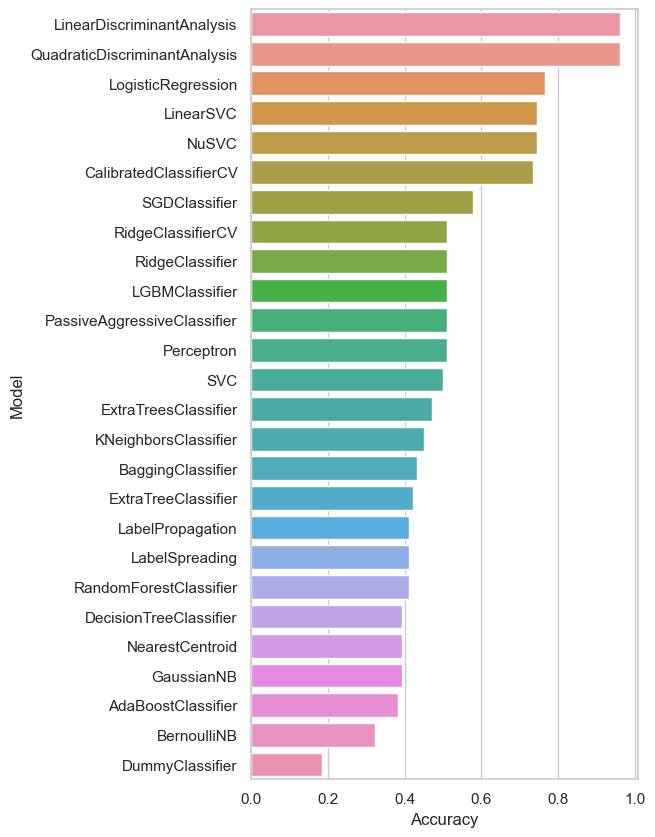

In [22]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Accuracy", data=predictions)

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# model=DecisionTreeClassifier(random_state=1001)
model=LinearDiscriminantAnalysis()

model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [24]:
model.score(X_test,y_test)

0.9607843137254902

In [25]:
name='Decission Tree Classifier'
kfold = model_selection.KFold(n_splits=10, random_state=1001,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Decission Tree Classifier: 0.927899 (0.066245)


In [26]:
predictions_train = model.predict(X_train)
print(accuracy_score(y_train, predictions_train))

0.9285714285714286


In [30]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       0.98      1.00      0.99        47
           3       0.96      0.98      0.97        47
           4       0.80      0.90      0.84        48
           5       0.93      0.78      0.84        49

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



In [31]:
predictions1 = model.predict(X_test)
print(accuracy_score(y_test, predictions1))

0.9607843137254902


# Predicción con información previa

In [32]:
data

,Unnamed: 0,Date,HomeTeam,AwayTeam,HG,AG,HP,AP,HTS,ATS,...,HPelotazos,APelotazos,HxG,AxG,year,month,day,TG,TxG,Mas2Goles
0,21,21.05.2023 11:30,Valencia,Real Madrid,1,0,27,73,12,13,...,51,51,1.00,1.40,2023,5,21,1,2.40,0
1,23,21.05.2023 07:00,Rayo Vallecano,Espanyol,1,2,64,36,15,10,...,88,75,2.00,1.60,2023,5,21,3,3.60,1
2,24,20.05.2023 14:00,Barcelona,Real Sociedad,1,2,67,33,13,13,...,57,54,1.50,2.00,2023,5,20,3,3.50,1
3,25,20.05.2023 11:30,Almería,Mallorca,3,0,54,46,12,7,...,57,74,1.80,0.80,2023,5,20,3,2.60,1
4,26,20.05.2023 11:30,Getafe,Elche,1,1,38,62,9,13,...,75,71,1.50,1.10,2023,5,20,2,2.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,364,14.08.2022 12:30,Valencia,Girona,1,0,46,54,17,5,...,57,60,1.60,0.10,2022,8,14,1,1.70,0
277,365,14.08.2022 10:30,Cádiz,Real Sociedad,0,1,40,60,7,15,...,90,63,0.20,1.50,2022,8,14,1,1.70,0
278,366,13.08.2022 14:00,Barcelona,Rayo Vallecano,0,0,67,33,21,4,...,70,76,1.90,0.50,2022,8,13,0,2.40,0
279,367,13.08.2022 12:00,Real Valladolid,Villarreal,0,3,52,48,12,10,...,64,78,1.00,1.50,2022,8,13,3,2.50,1


In [33]:
len(data)

281

In [34]:
def calcularDiferenciaGol5Prom():
    dataNueva= []
    for i in range(len(data)):
        infoAct=[]
        homeTeam = data.iloc[i]['HomeTeam']
        awayTeam = data.iloc[i]['AwayTeam']
        fecha_match =  data.iloc[i]['Fecha']
        infoHome = data[(data['HomeTeam'] == homeTeam) &  (data['Fecha'] < fecha_match )].copy().head(5)
        infoAway = data[(data['AwayTeam'] == awayTeam) & (data['Fecha'] < fecha_match )].copy().head(5)
        infoHome.drop(['Unnamed: 0','Resultado', 'year','month', 'day','Fecha','TG','TxG','Mas2Goles'], axis=1,inplace=True)
        infoAway.drop(['Unnamed: 0','Resultado', 'year','month', 'day','Fecha','TG','TxG','Mas2Goles'], axis=1,inplace=True)
        ##Solo se va a tomar en cuenta la información de cada equipo , más no las estadisticas que recibe en contra.
        infoHome = infoHome.mean()
        infoAway = infoAway.mean()
        if len(infoHome) > 56:
            for i in range(54):
                infoAct.append(0)
            dataNueva.append(infoAct)
            continue
        for i in range(0,len(infoHome),2):
            infoAct.append(infoHome[i])
            infoAct.append(infoAway[i+1])
        dataNueva.append(infoAct)
    return dataNueva

In [35]:
datosProm5Partidos = calcularDiferenciaGol5Prom()
cols= ["Prom5_HG","Prom5_AG","Prom5_HP","Prom5_AP","Prom5_HTS","Prom5_ATS","Prom5_HSI","Prom5_ASI","Prom5_HSO","Prom5_ASO","Prom5_HBS","Prom5_ABS","Prom5_HFK","Prom5_AFK","Prom5_HC","Prom5_AC","Prom5_HOF","Prom5_AOF","Prom5_HTI","Prom5_ATI","Prom5_HGS","Prom5_AGS","Prom5_HF","Prom5_AF","Prom5_HRC","Prom5_ARC","Prom5_HYC","Prom5_AYC","Prom5_HTP","Prom5_ATP","Prom5_HPC","Prom5_APC","Prom5_HT","Prom5_AT","Prom5_HA","Prom5_AA","Prom5_HDA","Prom5_ADA","Prom_HPCru","Prom5_APCru","Prom5_HTo","Prom5_ATo","Prom5_HInter","Prom5_AInter","Prom5_HDAG","Prom5_ADAG","Prom5_HDespeje","Prom5_ADespeje","Prom5_HGK","Prom5_AGK","Prom5_HPelotazos","Prom5_APelotazos","Prom5_HxG","Prom5_AxG"]

In [36]:
dataProm5P= pd.DataFrame(np.array(datosProm5Partidos), columns=cols)
dataProm5P

,Prom5_HG,Prom5_AG,Prom5_HP,Prom5_AP,Prom5_HTS,Prom5_ATS,Prom5_HSI,Prom5_ASI,Prom5_HSO,Prom5_ASO,...,Prom5_HDAG,Prom5_ADAG,Prom5_HDespeje,Prom5_ADespeje,Prom5_HGK,Prom5_AGK,Prom5_HPelotazos,Prom5_APelotazos,Prom5_HxG,Prom5_AxG
0,1.00,1.40,51.20,57.60,13.20,17.00,3.60,5.60,7.60,5.20,...,15.00,11.00,14.60,12.40,8.40,4.20,64.20,57.60,1.30,1.58
1,1.60,1.40,47.80,38.80,14.00,9.40,4.00,2.60,6.00,5.00,...,12.80,17.00,18.20,22.00,8.00,10.00,82.00,66.80,1.20,1.06
2,1.20,0.60,61.40,54.60,17.00,12.00,4.60,4.00,8.60,4.60,...,12.80,21.20,12.80,14.80,7.00,6.60,57.60,63.80,1.94,1.00
3,1.20,1.20,47.00,39.40,11.00,10.20,3.40,2.80,5.00,4.60,...,15.40,22.00,25.40,22.20,10.40,8.40,68.60,71.00,1.24,1.04
4,1.40,0.40,37.60,46.80,13.00,10.80,4.80,2.20,5.60,6.40,...,22.20,15.20,16.40,20.60,9.60,9.20,88.40,70.00,1.60,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
277,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
278,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
279,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [37]:
print(len(data_backup_2))
print(len(dataProm5P))

281
281


In [38]:
data_backup_2= data_backup_2.reset_index(drop=True).drop(columns=["Unnamed: 0"])
dataProm5P = dataProm5P.reset_index(drop=True)

In [39]:
dataProm5P_mod= pd.concat([data_backup_2, dataProm5P], axis=1) 

In [40]:
dataProm5P_mod

,Date,HomeTeam,AwayTeam,HG,AG,HP,AP,HTS,ATS,HSI,...,Prom5_HDAG,Prom5_ADAG,Prom5_HDespeje,Prom5_ADespeje,Prom5_HGK,Prom5_AGK,Prom5_HPelotazos,Prom5_APelotazos,Prom5_HxG,Prom5_AxG
0,21.05.2023 11:30,Valencia,Real Madrid,1,0,27,73,12,13,6,...,15.00,11.00,14.60,12.40,8.40,4.20,64.20,57.60,1.30,1.58
1,21.05.2023 07:00,Rayo Vallecano,Espanyol,1,2,64,36,15,10,5,...,12.80,17.00,18.20,22.00,8.00,10.00,82.00,66.80,1.20,1.06
2,20.05.2023 14:00,Barcelona,Real Sociedad,1,2,67,33,13,13,4,...,12.80,21.20,12.80,14.80,7.00,6.60,57.60,63.80,1.94,1.00
3,20.05.2023 11:30,Almería,Mallorca,3,0,54,46,12,7,3,...,15.40,22.00,25.40,22.20,10.40,8.40,68.60,71.00,1.24,1.04
4,20.05.2023 11:30,Getafe,Elche,1,1,38,62,9,13,5,...,22.20,15.20,16.40,20.60,9.60,9.20,88.40,70.00,1.60,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,14.08.2022 12:30,Valencia,Girona,1,0,46,54,17,5,2,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
277,14.08.2022 10:30,Cádiz,Real Sociedad,0,1,40,60,7,15,2,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
278,13.08.2022 14:00,Barcelona,Rayo Vallecano,0,0,67,33,21,4,6,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
279,13.08.2022 12:00,Real Valladolid,Villarreal,0,3,52,48,12,10,6,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [41]:
dataProm5P_mod= dataProm5P_mod[dataProm5P_mod['Prom5_HPC']>0]
dataProm5P_mod = dataProm5P_mod.dropna()
dataProm5P_mod

,Date,HomeTeam,AwayTeam,HG,AG,HP,AP,HTS,ATS,HSI,...,Prom5_HDAG,Prom5_ADAG,Prom5_HDespeje,Prom5_ADespeje,Prom5_HGK,Prom5_AGK,Prom5_HPelotazos,Prom5_APelotazos,Prom5_HxG,Prom5_AxG
0,21.05.2023 11:30,Valencia,Real Madrid,1,0,27,73,12,13,6,...,15.00,11.00,14.60,12.40,8.40,4.20,64.20,57.60,1.30,1.58
1,21.05.2023 07:00,Rayo Vallecano,Espanyol,1,2,64,36,15,10,5,...,12.80,17.00,18.20,22.00,8.00,10.00,82.00,66.80,1.20,1.06
2,20.05.2023 14:00,Barcelona,Real Sociedad,1,2,67,33,13,13,4,...,12.80,21.20,12.80,14.80,7.00,6.60,57.60,63.80,1.94,1.00
3,20.05.2023 11:30,Almería,Mallorca,3,0,54,46,12,7,3,...,15.40,22.00,25.40,22.20,10.40,8.40,68.60,71.00,1.24,1.04
4,20.05.2023 11:30,Getafe,Elche,1,1,38,62,9,13,5,...,22.20,15.20,16.40,20.60,9.60,9.20,88.40,70.00,1.60,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,02.09.2022 14:00,Celta de Vigo,Cádiz,3,0,58,42,9,7,5,...,8.00,16.00,11.00,30.00,5.00,11.00,43.00,87.00,1.40,1.00
259,28.08.2022 15:00,Espanyol,Real Madrid,1,3,36,64,15,19,4,...,19.00,5.00,8.00,11.50,8.00,6.50,67.00,47.00,0.80,2.90
260,28.08.2022 12:30,Barcelona,Real Valladolid,4,0,68,32,24,8,9,...,10.00,16.00,7.00,28.00,6.00,16.00,70.00,69.00,1.90,0.50
262,27.08.2022 15:00,Almería,Sevilla,2,1,32,68,11,13,5,...,7.00,18.00,32.00,23.00,8.00,5.00,59.00,81.00,0.70,0.90


In [42]:
def generar_predicciones():
    predicciones_partido=[]
    proba_gol_1=[]
    proba_gol_2=[]
    proba_gol_3=[]
    proba_gol_4=[]
    proba_gol_5=[]
    for i in range(len(dataProm5P_mod)):
        x_int= [dataProm5P_mod.iloc[i]['Prom5_HSI'],dataProm5P_mod.iloc[i]['Prom5_ASI'],
        dataProm5P_mod.iloc[i]['Prom5_HGS'],dataProm5P_mod.iloc[i]['Prom5_AGS'],
        dataProm5P_mod.iloc[i]['Prom5_HTo'],dataProm5P_mod.iloc[i]['Prom5_ADespeje'],dataProm5P_mod.iloc[i]['TG'] ]
        x_int= np.array(x_int)
        # Estandarizacion 
        x_int_estd = ss.transform([x_int])
        feature_names_act= ['HSI','ASI','HGS','AGS','HTo','ADespeje','TG']
        x_int_estd = pd.DataFrame(x_int_estd,columns=feature_names_act)
        x_int_estd= np.array(x_int_estd.drop(['TG'],1))
        predicc= model.predict(x_int_estd)
        predicc_proba= model.predict_proba(x_int_estd)
        proba_gol_1.append((predicc_proba[0])[0])
        proba_gol_2.append((predicc_proba[0])[1])
        proba_gol_3.append((predicc_proba[0])[2])
        proba_gol_4.append((predicc_proba[0])[3])
        proba_gol_5.append((predicc_proba[0])[4])
        predicciones_partido.append(predicc)
    return [predicciones_partido,proba_gol_1,proba_gol_2,proba_gol_3,proba_gol_4,proba_gol_5]

In [43]:
resultados= generar_predicciones()
predicciones_partido= resultados[0]
proba_gol_1= resultados[1]
proba_gol_2= resultados[2]
proba_gol_3= resultados[3]
proba_gol_4= resultados[4]
proba_gol_5= resultados[5]
dataProm5P_mod['Resultado_predicc']= pd.Series(predicciones_partido)
dataProm5P_mod['proba_gol_1']= pd.Series(proba_gol_1)
dataProm5P_mod['proba_gol_2']= pd.Series(proba_gol_2)
dataProm5P_mod['proba_gol_3']= pd.Series(proba_gol_3)
dataProm5P_mod['proba_gol_4']= pd.Series(proba_gol_4)
dataProm5P_mod['proba_gol_5']= pd.Series(proba_gol_5)

In [44]:
dataProm5P_mod= dataProm5P_mod.dropna()

In [45]:
dataProm5P_mod['Resultado_bien'] =  dataProm5P_mod['Resultado_predicc'] == dataProm5P_mod['TG']
dataProm5P_mod['Resultado_aprox'] = np.where(((dataProm5P_mod['Resultado_predicc']>=3) & (dataProm5P_mod['TG']>=2)),True,np.where(((dataProm5P_mod['Resultado_predicc']<=2) & (dataProm5P_mod['TG']<=3)),True,False))

In [46]:
dataProm5P_mod['Resultado_bien'].sum()

40

In [47]:
dataProm5P_mod['Resultado_aprox'].sum()

186

In [48]:
# dataProm5P_mod[['HomeTeam','AwayTeam','HG','AG','TG','Resultado_predicc','proba_gol_1','proba_gol_2','proba_gol_3','proba_gol_4','proba_gol_5','Resultado_bien','Resultado_aprox']]
dataProm5P_mod[['HomeTeam','AwayTeam','HG','AG','TG','Resultado_predicc','Resultado_bien','Resultado_aprox']]

,HomeTeam,AwayTeam,HG,AG,TG,Resultado_predicc,Resultado_bien,Resultado_aprox
0,Valencia,Real Madrid,1,0,1,[5],False,False
1,Rayo Vallecano,Espanyol,1,2,3,[1],False,True
2,Barcelona,Real Sociedad,1,2,3,[5],False,True
3,Almería,Mallorca,3,0,3,[1],False,True
4,Getafe,Elche,1,1,2,[1],False,True
...,...,...,...,...,...,...,...,...
249,Girona,Real Valladolid,2,1,3,[1],False,True
250,Real Valladolid,Almería,1,0,1,[1],True,True
251,Valencia,Getafe,5,1,6,[3],False,True
254,Osasuna,Rayo Vallecano,2,1,3,[5],False,True


# Prueba predicción de goles con otro modelo +-2.5 goles

se probó y alcanzó un 73% de predicciones correctas , pero no es muy diciente en cuánto a que partidos van a tener más goles que otros

# Predicción goles próximos partidos

In [49]:
X_train2 = pd.DataFrame(X_train,columns=feature_names)
X_test2 = pd.DataFrame(X_test,columns=feature_names)
y_train2 = pd.DataFrame(y_train,columns=['TG'])
y_test2 = pd.DataFrame(y_test,columns=['TG'])
X_predicc= pd.concat([X_train2,X_test2])
y_predicc= pd.concat([y_train2,y_test2])

In [50]:
model=LinearDiscriminantAnalysis()

model.fit(X_predicc, y_predicc)

LinearDiscriminantAnalysis()

In [51]:

proximos_partidos = proximos_partidos[['Date','HomeTeam','AwayTeam']]

proximos_partidos['year'] = (proximos_partidos['Date'].apply(conseguir_anio))
proximos_partidos['month'] = (proximos_partidos['Date'].apply(conseguir_mes))
proximos_partidos['day'] = (proximos_partidos['Date'].apply(conseguir_dia))
proximos_partidos['year'] = proximos_partidos['year'].astype(int)
proximos_partidos['month'] = proximos_partidos['month'].astype(int)
proximos_partidos['day'] = proximos_partidos['day'].astype(int)
proximos_partidos['Fecha']= pd.to_datetime(proximos_partidos[['year','month','day']])

In [52]:
def calcularDiferenciaGol5Prom_pred():
    dataNueva= []
    for i in range(len(proximos_partidos)):
        infoAct=[]
        homeTeam = proximos_partidos.iloc[i]['HomeTeam']
        awayTeam = proximos_partidos.iloc[i]['AwayTeam']
        fecha_match =  proximos_partidos.iloc[i]['Fecha']
        infoHome = data[(data['HomeTeam'] == homeTeam) &  (data['Fecha'] < fecha_match )].copy().head(5)
        infoAway = data[(data['AwayTeam'] == awayTeam) & (data['Fecha'] < fecha_match )].copy().head(5)
        infoHome.drop(['Unnamed: 0','Resultado', 'year','month', 'day','Fecha','TG','TxG','Mas2Goles'], axis=1,inplace=True)
        infoAway.drop(['Unnamed: 0','Resultado', 'year','month', 'day','Fecha','TG','TxG','Mas2Goles'], axis=1,inplace=True)
        ##Solo se va a tomar en cuenta la información de cada equipo , más no las estadisticas que recibe en contra.
        infoHome = infoHome.mean()
        infoAway = infoAway.mean()
        if len(infoHome) > 56:
            for i in range(54):
                infoAct.append(0)
            dataNueva.append(infoAct)
            continue
        for i in range(0,len(infoHome),2):
            infoAct.append(infoHome[i])
            infoAct.append(infoAway[i+1])
        dataNueva.append(infoAct)
    return dataNueva

In [53]:
datosProm5Partidos_prox = calcularDiferenciaGol5Prom_pred()
cols= ["Prom5_HG","Prom5_AG","Prom5_HP","Prom5_AP","Prom5_HTS","Prom5_ATS","Prom5_HSI","Prom5_ASI","Prom5_HSO","Prom5_ASO","Prom5_HBS","Prom5_ABS","Prom5_HFK","Prom5_AFK","Prom5_HC","Prom5_AC","Prom5_HOF","Prom5_AOF","Prom5_HTI","Prom5_ATI","Prom5_HGS","Prom5_AGS","Prom5_HF","Prom5_AF","Prom5_HRC","Prom5_ARC","Prom5_HYC","Prom5_AYC","Prom5_HTP","Prom5_ATP","Prom5_HPC","Prom5_APC","Prom5_HT","Prom5_AT","Prom5_HA","Prom5_AA","Prom5_HDA","Prom5_ADA","Prom_HPCru","Prom5_APCru","Prom5_HTo","Prom5_ATo","Prom5_HInter","Prom5_AInter","Prom5_HDAG","Prom5_ADAG","Prom5_HDespeje","Prom5_ADespeje","Prom5_HGK","Prom5_AGK","Prom5_HPelotazos","Prom5_APelotazos","Prom5_HxG","Prom5_AxG"]


In [54]:
dataProm5P_prox= pd.DataFrame(np.array(datosProm5Partidos_prox), columns=cols)
dataProm5P_prox


,Prom5_HG,Prom5_AG,Prom5_HP,Prom5_AP,Prom5_HTS,Prom5_ATS,Prom5_HSI,Prom5_ASI,Prom5_HSO,Prom5_ASO,...,Prom5_HDAG,Prom5_ADAG,Prom5_HDespeje,Prom5_ADespeje,Prom5_HGK,Prom5_AGK,Prom5_HPelotazos,Prom5_APelotazos,Prom5_HxG,Prom5_AxG
0,1.00,0.80,52.80,49.20,16.00,10.60,4.60,2.60,6.80,6.20,...,15.80,23.60,16.40,24.00,8.00,8.80,88.20,86.80,1.26,0.66
1,1.00,0.40,60.00,47.20,13.80,7.80,4.60,1.80,6.60,4.20,...,11.20,11.60,17.00,23.40,5.60,7.80,69.20,69.60,1.72,0.56
2,1.20,0.80,50.80,53.80,16.80,10.80,4.60,3.20,7.00,4.20,...,14.60,17.60,13.40,15.60,7.60,7.40,63.80,56.20,1.24,0.80
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.40,1.20,45.60,54.80,10.60,13.00,3.40,3.40,4.00,6.00,...,20.80,11.20,23.20,18.40,7.00,4.60,95.40,58.80,1.24,1.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
96,3.00,1.80,63.80,52.60,19.00,13.60,7.40,5.40,7.60,5.20,...,6.40,18.40,11.40,17.00,5.20,6.40,50.20,62.60,2.42,2.28
97,2.00,1.60,57.40,48.80,12.40,9.80,4.20,3.60,5.80,4.60,...,16.80,21.20,12.20,25.80,4.40,11.40,59.60,81.60,1.86,1.20
98,1.40,0.20,49.60,38.20,16.60,6.80,5.20,2.00,7.40,3.40,...,14.00,18.00,19.60,17.00,8.00,8.60,76.20,83.00,1.36,0.48


In [55]:
proximos_partidos= proximos_partidos.reset_index(drop=True)
dataProm5P_prox = dataProm5P_prox.reset_index(drop=True)

In [56]:
dataProm5P_mod_prox= pd.concat([proximos_partidos, dataProm5P_prox], axis=1)
dataProm5P_mod_prox['TG']= pd.Series(np.zeros(len(dataProm5P_mod_prox)))


In [57]:
dataProm5P_mod_prox

,Date,HomeTeam,AwayTeam,year,month,day,Fecha,Prom5_HG,Prom5_AG,Prom5_HP,...,Prom5_ADAG,Prom5_HDespeje,Prom5_ADespeje,Prom5_HGK,Prom5_AGK,Prom5_HPelotazos,Prom5_APelotazos,Prom5_HxG,Prom5_AxG,TG
0,14.04.2023 14:00,Rayo Vallecano,Osasuna,2023,4,14,2023-04-14,1.00,0.80,52.80,...,23.60,16.40,24.00,8.00,8.80,88.20,86.80,1.26,0.66,0.00
1,15.04.2023 07:00,Villarreal,Real Valladolid,2023,4,15,2023-04-15,1.00,0.40,60.00,...,11.60,17.00,23.40,5.60,7.80,69.20,69.60,1.72,0.56,0.00
2,15.04.2023 09:15,Athletic Club,Real Sociedad,2023,4,15,2023-04-15,1.20,0.80,50.80,...,17.60,13.40,15.60,7.60,7.40,63.80,56.20,1.24,0.80,0.00
3,15.04.2023 11:30,Real Betis,Espanyol,2023,4,15,2023-04-15,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,15.04.2023 14:00,Cádiz,Real Madrid,2023,4,15,2023-04-15,1.40,1.20,45.60,...,11.20,23.20,18.40,7.00,4.60,95.40,58.80,1.24,1.36,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,04.06.2023 11:30,Real Betis,Valencia,2023,6,4,2023-06-04,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
96,04.06.2023 11:30,Real Madrid,Athletic Club,2023,6,4,2023-06-04,3.00,1.80,63.80,...,18.40,11.40,17.00,5.20,6.40,50.20,62.60,2.42,2.28,0.00
97,04.06.2023 11:30,Real Sociedad,Sevilla,2023,6,4,2023-06-04,2.00,1.60,57.40,...,21.20,12.20,25.80,4.40,11.40,59.60,81.60,1.86,1.20,0.00
98,04.06.2023 11:30,Real Valladolid,Getafe,2023,6,4,2023-06-04,1.40,0.20,49.60,...,18.00,19.60,17.00,8.00,8.60,76.20,83.00,1.36,0.48,0.00


In [58]:
dataProm5P_mod_prox.to_excel("datos_promedio_5partidos_proximos_laliga.xlsx")

In [59]:
def generar_predicciones_pred():
    predicciones_partido=[]
    proba_gol_1=[]
    proba_gol_2=[]
    proba_gol_3=[]
    proba_gol_4=[]
    proba_gol_5=[]
    for i in range(len(dataProm5P_mod_prox)):
        x_int= [dataProm5P_mod.iloc[i]['Prom5_HSI'],dataProm5P_mod.iloc[i]['Prom5_ASI'],
        dataProm5P_mod.iloc[i]['Prom5_HGS'],dataProm5P_mod.iloc[i]['Prom5_AGS'],
        dataProm5P_mod.iloc[i]['Prom5_HTo'],dataProm5P_mod.iloc[i]['Prom5_ADespeje'],dataProm5P_mod.iloc[i]['TG'] ]
        x_int= np.array(x_int)
        # Estandarizacion 
        x_int_estd = ss.transform([x_int])
        feature_names_act= ['HSI','ASI','HGS','AGS','HTo','ADespeje','TG']
        x_int_estd = pd.DataFrame(x_int_estd,columns=feature_names_act)
        x_int_estd= np.array(x_int_estd.drop(['TG'],1))
        predicc= model.predict(x_int_estd)
        predicc_proba= model.predict_proba(x_int_estd)
        proba_gol_1.append((predicc_proba[0])[0])
        proba_gol_2.append((predicc_proba[0])[1])
        proba_gol_3.append((predicc_proba[0])[2])
        proba_gol_4.append((predicc_proba[0])[3])
        proba_gol_5.append((predicc_proba[0])[4])
        predicciones_partido.append(predicc)
    return [predicciones_partido,proba_gol_1,proba_gol_2,proba_gol_3,proba_gol_4,proba_gol_5]

In [60]:
resultados= generar_predicciones_pred()
predicciones_partido= resultados[0]
proba_gol_1= resultados[1]
proba_gol_2= resultados[2]
proba_gol_3= resultados[3]
proba_gol_4= resultados[4]
proba_gol_5= resultados[5]
dataProm5P_mod_prox['Resultado_predicc']= pd.Series(predicciones_partido)
dataProm5P_mod_prox['proba_gol_1']= pd.Series(proba_gol_1)
dataProm5P_mod_prox['proba_gol_2']= pd.Series(proba_gol_2)
dataProm5P_mod_prox['proba_gol_3']= pd.Series(proba_gol_3)
dataProm5P_mod_prox['proba_gol_4']= pd.Series(proba_gol_4)
dataProm5P_mod_prox['proba_gol_5']= pd.Series(proba_gol_5)
dataProm5P_mod_prox['Prediccion_gol_apuesta'] = np.where(((dataProm5P_mod_prox['Resultado_predicc']>=3)),"+2 Goles o +1.5 Goles","-4 Goles o -3.5 Goles")

In [61]:
dataProm5P_mod_prox[['HomeTeam','AwayTeam','Resultado_predicc','Prediccion_gol_apuesta','proba_gol_1','proba_gol_2','proba_gol_3','proba_gol_4','proba_gol_5']]

,HomeTeam,AwayTeam,Resultado_predicc,Prediccion_gol_apuesta,proba_gol_1,proba_gol_2,proba_gol_3,proba_gol_4,proba_gol_5
0,Rayo Vallecano,Osasuna,[5],+2 Goles o +1.5 Goles,0.00,0.00,0.00,0.00,1.00
1,Villarreal,Real Valladolid,[1],-4 Goles o -3.5 Goles,1.00,0.00,0.00,0.00,0.00
2,Athletic Club,Real Sociedad,[5],+2 Goles o +1.5 Goles,0.00,0.00,0.00,0.01,0.99
3,Real Betis,Espanyol,[1],-4 Goles o -3.5 Goles,1.00,0.00,0.00,0.00,0.00
4,Cádiz,Real Madrid,[1],-4 Goles o -3.5 Goles,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
95,Real Betis,Valencia,[1],-4 Goles o -3.5 Goles,0.72,0.28,0.00,0.00,0.00
96,Real Madrid,Athletic Club,[1],-4 Goles o -3.5 Goles,1.00,0.00,0.00,0.00,0.00
97,Real Sociedad,Sevilla,[2],-4 Goles o -3.5 Goles,0.00,0.97,0.03,0.00,0.00
98,Real Valladolid,Getafe,[4],+2 Goles o +1.5 Goles,0.00,0.00,0.00,0.87,0.13


In [ ]:
# Guardar el modelo en un .pkl
import pickle
pickle.dump(model, open("model_laliga.pkl", "wb"))
# Guardar el scaler en un .pkl
pickle.dump(ss, open("scaler_laliga.pkl", "wb"))


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a4052e7-2e71-4dc5-adb3-89f874561d93' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>